In [1]:
import pandas as pd
import numpy as np

C:\Users\Alexandra\AppData\Local\Temp\ipykernel_7828\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Биномиальное распределение

Посмотрим на тот же эксперимент, но проанализируем метрику retention_7 — показатель, продолжал ли пользователь играть в игру на седьмой день после скачивания.

In [4]:
data = pd.read_csv("../data/cookie_cats.csv")
data = data.drop(columns=['userid', 'sum_gamerounds', 'retention_1'])
data

,version,retention_7
0,gate_30,False
1,gate_30,False
2,gate_40,False
3,gate_40,False
4,gate_40,True
...,...,...
90184,gate_40,False
90185,gate_40,False
90186,gate_30,False
90187,gate_40,False


Для данных с распределением Бернулли используется z-критерий пропорций.

In [13]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
A = data[data.version == 'gate_30'].retention_7
B = data[data.version == 'gate_40'].retention_7
proportions_ztest([A.sum(), B.sum()],
                  [len(A), len(B)])

(3.164358912748191, 0.001554249975614329)

Сделайте вывод о значимости изменения retention и результате эксперимента:

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Биномиальное распределение и MDE

In [ ]:
adsmart_data = pd.read_csv("../data/ad_smart.csv")
adsmart_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


Сайт внедряет новый вид рекламы — AdSmart.<br>Задача: проверить, повлияет ли он на выбор ответов "да" в опроснике BIO questionnaire.

$H_0:$ Нет существенной разницы между показателями успешности рекламы в группах <br>
$H_1:$ Существует значительная разница между показателями успешности рекламы в группах

In [ ]:
power = 0.8
alpha = 0.05

Для начала очистим данные: оставьте только кейсы, в которых пользователи ответили на вопрос (есть значение "да" или "нет") и оставьте только колонку "да"

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
adsmart_data = adsmart_data[(adsmart_data.yes != 0) | (adsmart_data.no != 0)].drop(columns=['no']).reset_index(drop=True)
adsmart_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
...,...,...,...,...,...,...,...,...
1238,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1
1239,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1
1240,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0
1241,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0


Используя группу `control` в полученном датасете, найдите среднее количество (`baseline_rate`) ответов "да". Можно округлить до двух знаков после точки.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
A = adsmart_data[adsmart_data.experiment == 'control']
B = adsmart_data[adsmart_data.experiment == 'exposed']
baseline_rate = round(A.yes.mean(), 2)
baseline_rate

0.45

Хотим использовать тест пропорций. Рассчитайте, effect size для заданного MDE при соотношении выборок 50/50

In [ ]:
from statsmodels.stats.api import proportion_effectsize
MDE = 0.05
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
effect_size = proportion_effectsize(baseline_rate, baseline_rate + MDE)
effect_size

-0.10016742116155997

И необходимое количество наблюдений для контрольной и тестовой выборок (округлить вверх)

In [ ]:
from statsmodels.stats.power import zt_ind_solve_power
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
np.ceil(zt_ind_solve_power(effect_size = effect_size, alpha = alpha, power = power, alternative='two-sided'))

1565.0

Достаточно ли наблюдений для эксперимента с заданным MDE?

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Другие распределения

In [31]:
from scipy import stats

A = np.concatenate((stats.norm(loc=2, scale=2).rvs(size=900), stats.norm(loc=12, scale=2).rvs(size=900)))
B = np.concatenate((stats.norm(loc=1, scale=3).rvs(size=600),
                    stats.norm(loc=7, scale=1).rvs(size=600),
                    stats.norm(loc=13, scale=1).rvs(size=600)))

Посмотрите на графики плотностей этих синтетических распределений.

<Axes: ylabel='Density'>

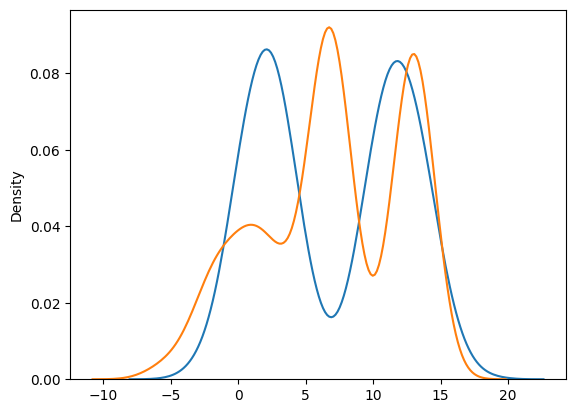

In [32]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import seaborn as sns

sns.kdeplot(A)
sns.kdeplot(B)

Если данные не удовлетворяют условиям, необходимым для применения параметрических стат.критериев, можно использовать непараметрический тест Манна-Уитни. Найдите с его помощью p-value для данных A и B:

In [33]:
from scipy.stats import mannwhitneyu

alpha = 0.05
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
mannwhitneyu(A, B)

MannwhitneyuResult(statistic=1591431.0, pvalue=0.3595579034204869)

### Продолжительность наблюдений, величина эффекта

Возьмём один из экспериментов [датасета платформы ASOS.com](https://osf.io/64jsb/)

In [14]:
data = pd.read_csv("../data/asos_digital_experiments_dataset.csv")
data = data[data.experiment_id == '036afc']
data

,experiment_id,variant_id,metric_id,time_since_start,count_c,count_t,mean_c,mean_t,variance_c,variance_t
0,036afc,2,1,1.5,188065.0,186686.0,0.107808,0.107828,0.096186,0.096201
1,036afc,2,1,2.0,245041.0,243694.0,0.131790,0.131435,0.114422,0.114160
2,036afc,2,1,2.5,277237.0,275949.0,0.143065,0.142711,0.122598,0.122345
3,036afc,2,1,3.0,315689.0,314676.0,0.161789,0.160997,0.135613,0.135077
4,036afc,2,1,3.5,338631.0,337715.0,0.172474,0.171067,0.142727,0.141803
...,...,...,...,...,...,...,...,...,...,...
523,036afc,2,4,74.5,1040896.0,1040212.0,146.911169,146.750234,76511.749251,76509.544866
524,036afc,2,4,75.0,1044740.0,1044065.0,147.328828,147.119653,77121.192206,77071.197961
525,036afc,2,4,75.5,1046104.0,1045507.0,147.477715,147.234885,77220.485837,77173.139114
526,036afc,2,4,76.0,1049510.0,1048990.0,147.944232,147.690193,77707.794363,77711.375918


Рассчитайте effect size для t-теста с двусторонней альтернативой в каждый момент времени.

In [17]:
from statsmodels.stats import power

alpha = 0.05
beta = 0.8
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data['effect_size'] = data.apply(lambda x: power.TTestIndPower().solve_power(power=beta,
                                                                             alpha=alpha,
                                                                             nobs1=x.count_c,
                                                                             ratio=x.count_t / x.count_c,
                                                                             alternative='two-sided'), axis=1)
data

,experiment_id,variant_id,metric_id,time_since_start,count_c,count_t,mean_c,mean_t,variance_c,variance_t,effect_size
0,036afc,2,1,1.5,188065.0,186686.0,0.107808,0.107828,0.096186,0.096201,0.009153
1,036afc,2,1,2.0,245041.0,243694.0,0.131790,0.131435,0.114422,0.114160,0.008016
2,036afc,2,1,2.5,277237.0,275949.0,0.143065,0.142711,0.122598,0.122345,0.007536
3,036afc,2,1,3.0,315689.0,314676.0,0.161789,0.160997,0.135613,0.135077,0.007057
4,036afc,2,1,3.5,338631.0,337715.0,0.172474,0.171067,0.142727,0.141803,0.006813
...,...,...,...,...,...,...,...,...,...,...,...
523,036afc,2,4,74.5,1040896.0,1040212.0,146.911169,146.750234,76511.749251,76509.544866,0.003884
524,036afc,2,4,75.0,1044740.0,1044065.0,147.328828,147.119653,77121.192206,77071.197961,0.003877
525,036afc,2,4,75.5,1046104.0,1045507.0,147.477715,147.234885,77220.485837,77173.139114,0.003876
526,036afc,2,4,76.0,1049510.0,1048990.0,147.944232,147.690193,77707.794363,77711.375918,0.003869


Постройте график зависимости effect size от суммы count:

<Axes: >

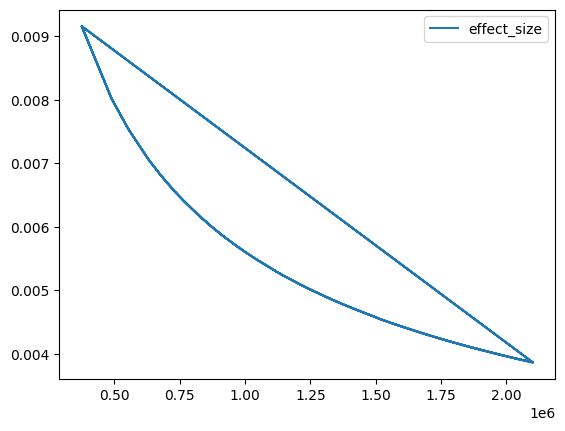

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
pd.DataFrame({'effect_size': np.array(data.effect_size)}, index = data.count_c + data.count_t).plot()